In [13]:
# Import libaries and illustris library
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.use('pdf')
import random
import subroutines.distance as df
hubble = 0.704
plt.style.use('ggplot')
%load_ext autoreload 
%autoreload 2
import importlib
importlib.reload(df)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'subroutines.distance' from '/Users/alex/Documents/Research/Astro/git_rep/web/code/subroutines/distance.py'>

# everything in units of h!

In [14]:
# set all file paths
crit_file_0 = '/Users/alex/Documents/Research/Astro/vm_shared_folder_v2/il_1_snap_135_posdata_halo_mass_cutoff.txt.NDnet_c5.07e-07.up.NDskl.a.crits'
crit_file_1= '/Users/alex/Documents/Research/Astro/vm_shared_folder_v2/il_1_snap_116_posdata_halo_mass_cutoff.txt.NDnet_c7.5e-06.up.NDskl.a.crits'
crit_file_2= '/Users/alex/Documents/Research/Astro/vm_shared_folder_v2/il_1_snap_103_posdata_halo_mass_cutoff.txt.NDnet_c7e-06.up.NDskl.a.crits'
crit_file_3 = '/Users/alex/Documents/Research/Astro/vm_shared_folder_v2/il_1_snap_85_posdata_halo_mass_cutoff.txt.NDnet_c7e-06.up.NDskl.a.crits'

seg_file_0 = '/Users/alex/Documents/Research/Astro/vm_shared_folder_v2/il_1_snap_135_posdata_halo_mass_cutoff.txt.NDnet_s2.02.up.NDskl.BRK.S1000.a.segs'
seg_file_1 = '/Users/alex/Documents/Research/Astro/vm_shared_folder_v2/il_1_snap_116_posdata_halo_mass_cutoff.txt.NDnet_s5.19.up.NDskl.a.segs'
seg_file_2 = '/Users/alex/Documents/Research/Astro/vm_shared_folder_v2/il_1_snap_103_posdata_halo_mass_cutoff.txt.NDnet_s5.41.up.NDskl.a.segs'
seg_file_3 = '/Users/alex/Documents/Research/Astro/vm_shared_folder_v2/il_1_snap_85_posdata_halo_mass_cutoff.txt.NDnet_s5.8.up.NDskl.a.segs'

galaxy_data_file_0 = '/Users/alex/Documents/Research/Astro/git_rep/Data/GalaxyData/GalaxyData_Snap.135.txt'
galaxy_data_file_1 = '/Users/alex/Documents/Research/Astro/git_rep/Data/GalaxyData/GalaxyData_Snap.116.txt'
galaxy_data_file_2 = '/Users/alex/Documents/Research/Astro/git_rep/Data/GalaxyData/GalaxyData_Snap.103.txt'
galaxy_data_file_3 = '/Users/alex/Documents/Research/Astro/git_rep/Data/GalaxyData/GalaxyData_Snap.85.txt'

numbers=4;

In [15]:
# load data of segments from DisPerSE output
for i in range (0,numbers):
    vars()['seg_pos_'+str(i)] = np.loadtxt(vars()['seg_file_'+str(i)], comments='#')[:,0:3]/hubble

In [16]:
# load data of critical points from DisPerSE output
for i in range (0,numbers):
    vars()['crit_pos_'+str(i)] = np.loadtxt(vars()['crit_file_'+str(i)], comments='#')
    vars()['crit_pos_'+str(i)] = vars()['crit_pos_'+str(i)][vars()['crit_pos_'+str(i)][:,4]>2][:,0:3]/hubble

In [17]:
# load data on specific galaxies from file
# 0:HaloNumber, 1:SubhaloNumber, 2:StellarMass, 3:GasMass, 4:DarkMatterMass, 5-7:SubhaloPosition x,y,z
# 8-10:CoM Velocity x, CoM Velocity y, CoM Velocity z, 11-13:AngularMomentum x, AngularMomentum y, AngularMomentum z, 
# 14:Kappa, 15:Flatness, 16:Ellip, 17:Lambda, 18:BHMass 19:BMMassDot 20:StarFormationRate (MDot) 21:N(sub_z=0) 22:N(sub_z_next) 23:N(sub_z_previous)
for i in range (0,numbers):
    vars()['galaxy_data_'+str(i)] = np.genfromtxt(vars()['galaxy_data_file_'+str(i)], comments='#')

for i in range (0,numbers):
    vars()['galaxy_positions_'+str(i)] = vars()['galaxy_data_'+str(i)][:,5:8]

In [18]:
# compute distances of galaxies to clusters
for i in range (0,numbers):
    vars()['galaxy_seg_distance_'+str(i)] = df.distance_function(vars()['galaxy_positions_'+str(i)], vars()['seg_pos_'+str(i)])

distance_function done with 0.0 %
distance_function done with 10.0 %
distance_function done with 20.0 %
distance_function done with 30.0 %
distance_function done with 40.0 %
distance_function done with 50.0 %
distance_function done with 60.0 %
distance_function done with 70.0 %
distance_function done with 80.0 %
distance_function done with 90.0 %
distance_function done with 100.0 %
distance_function done with 0.0 %
distance_function done with 10.0 %
distance_function done with 20.0 %
distance_function done with 30.0 %
distance_function done with 40.0 %
distance_function done with 50.0 %
distance_function done with 60.0 %
distance_function done with 70.0 %
distance_function done with 80.0 %
distance_function done with 90.0 %
distance_function done with 100.0 %
distance_function done with 0.0 %
distance_function done with 10.0 %
distance_function done with 20.0 %
distance_function done with 30.0 %
distance_function done with 40.0 %
distance_function done with 50.0 %
distance_function don

In [20]:
# compute distances of galaxies to filaments
for i in range (0,numbers):
    vars()['galaxy_crit_distance_'+str(i)] = df.distance_function(vars()['galaxy_positions_'+str(i)], vars()['crit_pos_'+str(i)])

distance_function done with 0.0 %
distance_function done with 10.0 %
distance_function done with 20.0 %
distance_function done with 30.0 %
distance_function done with 40.0 %
distance_function done with 50.0 %
distance_function done with 60.0 %
distance_function done with 70.0 %
distance_function done with 80.0 %
distance_function done with 90.0 %
distance_function done with 100.0 %
distance_function done with 0.0 %
distance_function done with 10.0 %
distance_function done with 20.0 %
distance_function done with 30.0 %
distance_function done with 40.0 %
distance_function done with 50.0 %
distance_function done with 60.0 %
distance_function done with 70.0 %
distance_function done with 80.0 %
distance_function done with 90.0 %
distance_function done with 100.0 %
distance_function done with 0.0 %
distance_function done with 10.0 %
distance_function done with 20.0 %
distance_function done with 30.0 %
distance_function done with 40.0 %
distance_function done with 50.0 %
distance_function don

In [21]:
# compute aligment of galaxies with nearest filament
for i in range (0,numbers):
    vars()['galaxy_seg_alignment_'+str(i)] = df.align_function(vars()['galaxy_data_'+str(i)][:,11:14], vars()['galaxy_seg_distance_'+str(i)][:,:], vars()['seg_pos_'+str(i)][:,:])


align_function done with 0.0 %
align_function done with 25.0 %
align_function done with 50.0 %
align_function done with 75.0 %
align_function done with 100.0 %
align_function done with 0.0 %
align_function done with 25.0 %
align_function done with 50.0 %
align_function done with 75.0 %
align_function done with 0.0 %
align_function done with 25.0 %
align_function done with 50.0 %
align_function done with 75.0 %
align_function done with 0.0 %
align_function done with 25.0 %
align_function done with 50.0 %
align_function done with 75.0 %
align_function done with 100.0 %


In [22]:
# Add the output of the distance function and aligment function to the end of the matrix
    # 0:HaloNumber, 1:SubhaloNumber, 2-4:SubhaloPosition x,y,z, 
    # 5: Index of nearest critical point, 6: absolute distance to crit., 7-9: nearest critical point coordinates, 
    # 10: Index of nearest filament, 11:absolute distance to filament, 12-14: nearest filament coordinates,
    # 15: cos(theta) with nearest filament, 16: sin(theta) with nearest filament
    # 17: cluster=1, filament=0, none=-1
for i in range (0,numbers):
# preload data
    vars()['galaxy_web_data_'+str(i)] = np.zeros((vars()['galaxy_data_'+str(i)].shape[0], 18))
    vars()['galaxy_web_data_'+str(i)][:,0:2] = vars()['galaxy_data_'+str(i)][:,0:2]
    vars()['galaxy_web_data_'+str(i)][:,2:5] = vars()['galaxy_data_'+str(i)][:,5:8]
# critical points and filaments
    vars()['galaxy_web_data_'+str(i)][:,5:7] = vars()['galaxy_crit_distance_'+str(i)][:,:]
    vars()['galaxy_web_data_'+str(i)][:,10:12] = vars()['galaxy_seg_distance_'+str(i)][:,:]
# theta
    vars()['galaxy_web_data_'+str(i)][:,15] = vars()['galaxy_seg_alignment_'+str(i)][:,2]
    vars()['galaxy_web_data_'+str(i)][:,16] = vars()['galaxy_seg_alignment_'+str(i)][:,3]

 

In [23]:
# add the positions of nearest clusters and filaments and compute whether galaxy is in one of them
for i in range (0,numbers):
    current_file = vars()['galaxy_web_data_'+str(i)]
    
    #
    # ASSUMPTION: Cluster and Filament radius 2000kpc, 700kpc
    #
    # create mask with preset distances
    crits_mask = (current_file[:,6] < 2000)
    segs_mask =  (current_file[:,11] < 700)
    
    for j in range (0, current_file.shape[0]):
        # load coordinates of critical points and filaments by using the index of nearest one and getting coordinates from illustris output
        current_file[j,7:10] =  vars()['crit_pos_'+str(i)][int( vars()['galaxy_crit_distance_'+str(i)][j,0])]
        current_file[j,12:15] = vars()['seg_pos_'+str(i)] [int( vars()['galaxy_seg_distance_' +str(i)][j,0])]
        
        if (crits_mask[j] == True):
            current_file[j,17] = 1
        elif(segs_mask[j] == True):
            current_file[j,17] = 0
        else:
            current_file[j,17] = -1
    
    vars()['galaxy_web_data_'+str(i)] = current_file 

In [24]:
snap=[135, 116, 103, 85]
for i in range (0,numbers):
    np.savetxt('/Users/alex/Documents/Research/Astro/git_rep/Data/WebData/galaxy_web_data.'+str(snap[i])+'.txt', vars()['galaxy_web_data_'+str(i)], delimiter =' ', 
           header = '0:HaloNumber, 1:SubhaloNumber, 2-4:SubhaloPosition x,y,z, 5: Index of nearest critical point, 6: absolute distance to crit., 7-9: nearest critical point coordinates, 10: Index of nearest filament, 11:absolute distance to filament, 12-14: nearest filament coordinates, 15: cos theta , 16: sin theta, 17: in filament/cluster (1,0,-1))' 
               )

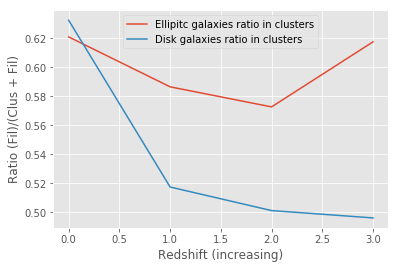

In [270]:
# count how many galaxies are in clusters vs filaments
fil_count = np.zeros((4,2))
clus_count = np.zeros((4,2))
out_count = np.zeros((4,2))
for i in range (0,4):
    kappa_mask_0 = vars()['galaxy_web_data_'+str(i)][(vars()['galaxy_data_'+str(i)][:,14]<0.5)]
    fil_count[i,0] =  (kappa_mask_0[:,16] == 0).sum()
    clus_count[i,0] = (kappa_mask_0[:,16] == 1).sum()
    out_count[i,0] =  (kappa_mask_0[:,16] == -1).sum()
    kappa_mask_1 = vars()['galaxy_web_data_'+str(i)][(vars()['galaxy_data_'+str(i)][:,14]>0.5)]
    fil_count[i,1] =  (kappa_mask_1[:,16] == 0).sum()
    clus_count[i,1] = (kappa_mask_1[:,16] == 1).sum()
    out_count[i,1] =  (kappa_mask_1[:,16] == -1).sum()
ax1 = plt.gca()
ax1.plot(fil_count[:,0]/(fil_count[:,0]+clus_count[:,0]), label='Ellipitc galaxies ratio in clusters')
ax1.plot(fil_count[:,1]/(fil_count[:,1]+clus_count[:,1]), label='Disk galaxies ratio in clusters')
ax1.legend(loc='best')
ax1.set_xlabel('Redshift (increasing)'); ax1.set_ylabel('Ratio (Fil)/(Clus + Fil)')
plt.show()

In [262]:
out_count/(fil_count+clus_count+out_count)

array([[ 259.,  118.],
       [ 200.,   95.],
       [ 205.,   74.],
       [ 181.,   88.]])

old vvv

In [ ]:
halo_file_1 = "/Users/alex/Documents/Research/Astro/vm_shared_folder_v2/il_1_snap_135_posdata_halo_mass_cutoff.txt"
halo_data_joined_masscut_e9= np.loadtxt(halo_file_1, comments='#', delimiter=',')[:,0:3]/0.7
halo_file_2 = "/Users/alex/Documents/Research/Astro/vm_shared_folder_v2/il_1_snap_85_posdata_halo_mass_cutoff.txt"
halo_data_joined_masscut_e9_z1= np.loadtxt(halo_file_2, comments='#', delimiter=',')[:,0:3]/0.7
halo_file_3 = "/Users/alex/Documents/Research/Astro/vm_shared_folder_v2/il_1_snap_103_posdata_halo_mass_cutoff.txt"
halo_data_joined_masscut_e9_z050= np.loadtxt(halo_file_3, comments='#', delimiter=',')[:,0:3]/0.7
halo_file_4 = "/Users/alex/Documents/Research/Astro/vm_shared_folder_v2/il_1_snap_116_posdata_halo_mass_cutoff.txt"
halo_data_joined_masscut_e9_z025= np.loadtxt(halo_file_4, comments='#', delimiter=',')[:,0:3]/0.7

In [ ]:

halo_file_1 = "/Users/alex/Documents/Research/Astro/vm_shared_folder_v2/il_1_snap_135_posdata_halo_mass_cutoff.txt"
halo_positions = np.loadtxt(halo_file_1, comments='#', delimiter=',')[:,0:3]/0.7
halo_mass = np.loadtxt(halo_file_1, comments='#', delimiter=',')[:,3]

In [38]:
# Now do same thing for halo data:

# 0-2: CM position, 3: halo mass, 4: index of nearest filament point, 5: filament absolute distance
# 6: index of nearest crit point, 7: crit absolute distance, 8: bool in cluster, 9: bool in filament

halo_data = np.zeros((halo_positions.shape[0], 10))
halo_data[:,0:3] = halo_positions
halo_data[:,3] = halo_mass
halo_data = halo_data[halo_data[:,3]>=0.5][:,:]

In [39]:
halo_segs_distance_mat = df.distance_function(halo_data[halo_data[:,3]>=0.5][:,0:3], segs_pos)

distance_function done with 0.0 %
distance_function done with 10.0 %
distance_function done with 20.0 %
distance_function done with 30.0 %
distance_function done with 40.0 %
distance_function done with 50.0 %
distance_function done with 60.0 %
distance_function done with 70.0 %
distance_function done with 80.0 %
distance_function done with 90.0 %
distance_function done with 100.0 %


In [40]:
halo_crits_distance_mat = df.distance_function(halo_data[halo_data[:,3]>=0.5][:,0:3], crits_pos)

distance_function done with 0.0 %
distance_function done with 10.0 %
distance_function done with 20.0 %
distance_function done with 30.0 %
distance_function done with 40.0 %
distance_function done with 50.0 %
distance_function done with 60.0 %
distance_function done with 70.0 %
distance_function done with 80.0 %
distance_function done with 90.0 %
distance_function done with 100.0 %


In [41]:
halo_data[:,4:6] = halo_segs_distance_mat
halo_data[:,6:8] = halo_crits_distance_mat

halo_data_crits_mask = (halo_data[:,7] < 2000)
halo_data_segs_mask = (halo_data[:,5] < 700)
    
for i in range (0, halo_data.shape[0]):
    if (halo_data_crits_mask[i] == True):
        halo_data[i,8] = 1
        halo_data[i,9] = 0
    elif(halo_data_segs_mask[i] == True):
        halo_data[i,8] = 0
        halo_data[i,9] = 1
    else:
        halo_data[i,8] = 0
        halo_data[i,9] = 0


In [42]:
np.savetxt('./data/halo_data_full_sim_v2.txt',
           halo_data, header="0-2: CM position, 3: halo mass, 4: index of nearest filament point, 5: filament absolute distance, 6: index of nearest crit point, 7: crit absolute distance, 8: bool in cluster, 9: bool in filament")